# <center>CROP RECOMMENDATION USING WEATHER AND SOIL CONTENT</center>
<center><img src= "https://media.nationalgeographic.org/assets/photos/120/983/091a0e2f-b93d-481b-9a60-db520c87ec33.jpg" alt ="Titanic" style='width:500px;'></center><br>


- <h3> Machine Learning is well equipped when it comes to analyzing data regarding soil conditions, including moisture level, temperature, and chemical makeup, all of which have an impact upon crop growth and livestock well-being.<br>
- <h3> Today in agriculture, this can allow crops to be grown at much higher precision, enabling farmers to treat plants and animals almost individually, which in turn significantly increases the effectiveness of farmers' decisions.<br>
- <h3> Using this can develop means to even predict harvest yields and evaluate crop quality for individual plant species to detect crop disease and weed infestations which were previouly impossible!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

%matplotlib inline

In [3]:
df=pd.read_csv('C:/Users/billy/Downloads/Crop_recommendation.csv')
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

# Exploratory Data Analysis
### Data Pre-processing

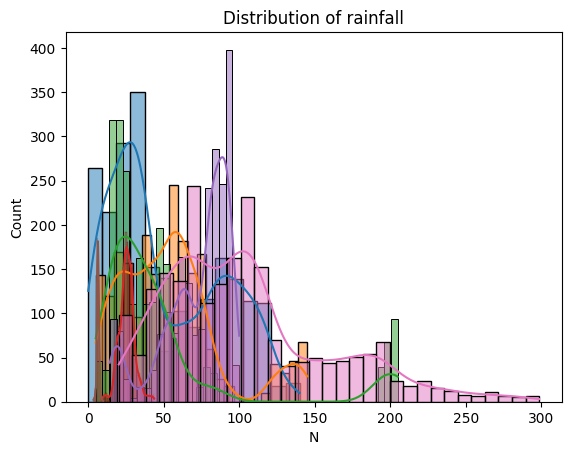

In [5]:
for column in df.select_dtypes(include=[np.number]).columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show

### Pairplot to explore relationships between variables


<function matplotlib.pyplot.show(close=None, block=None)>

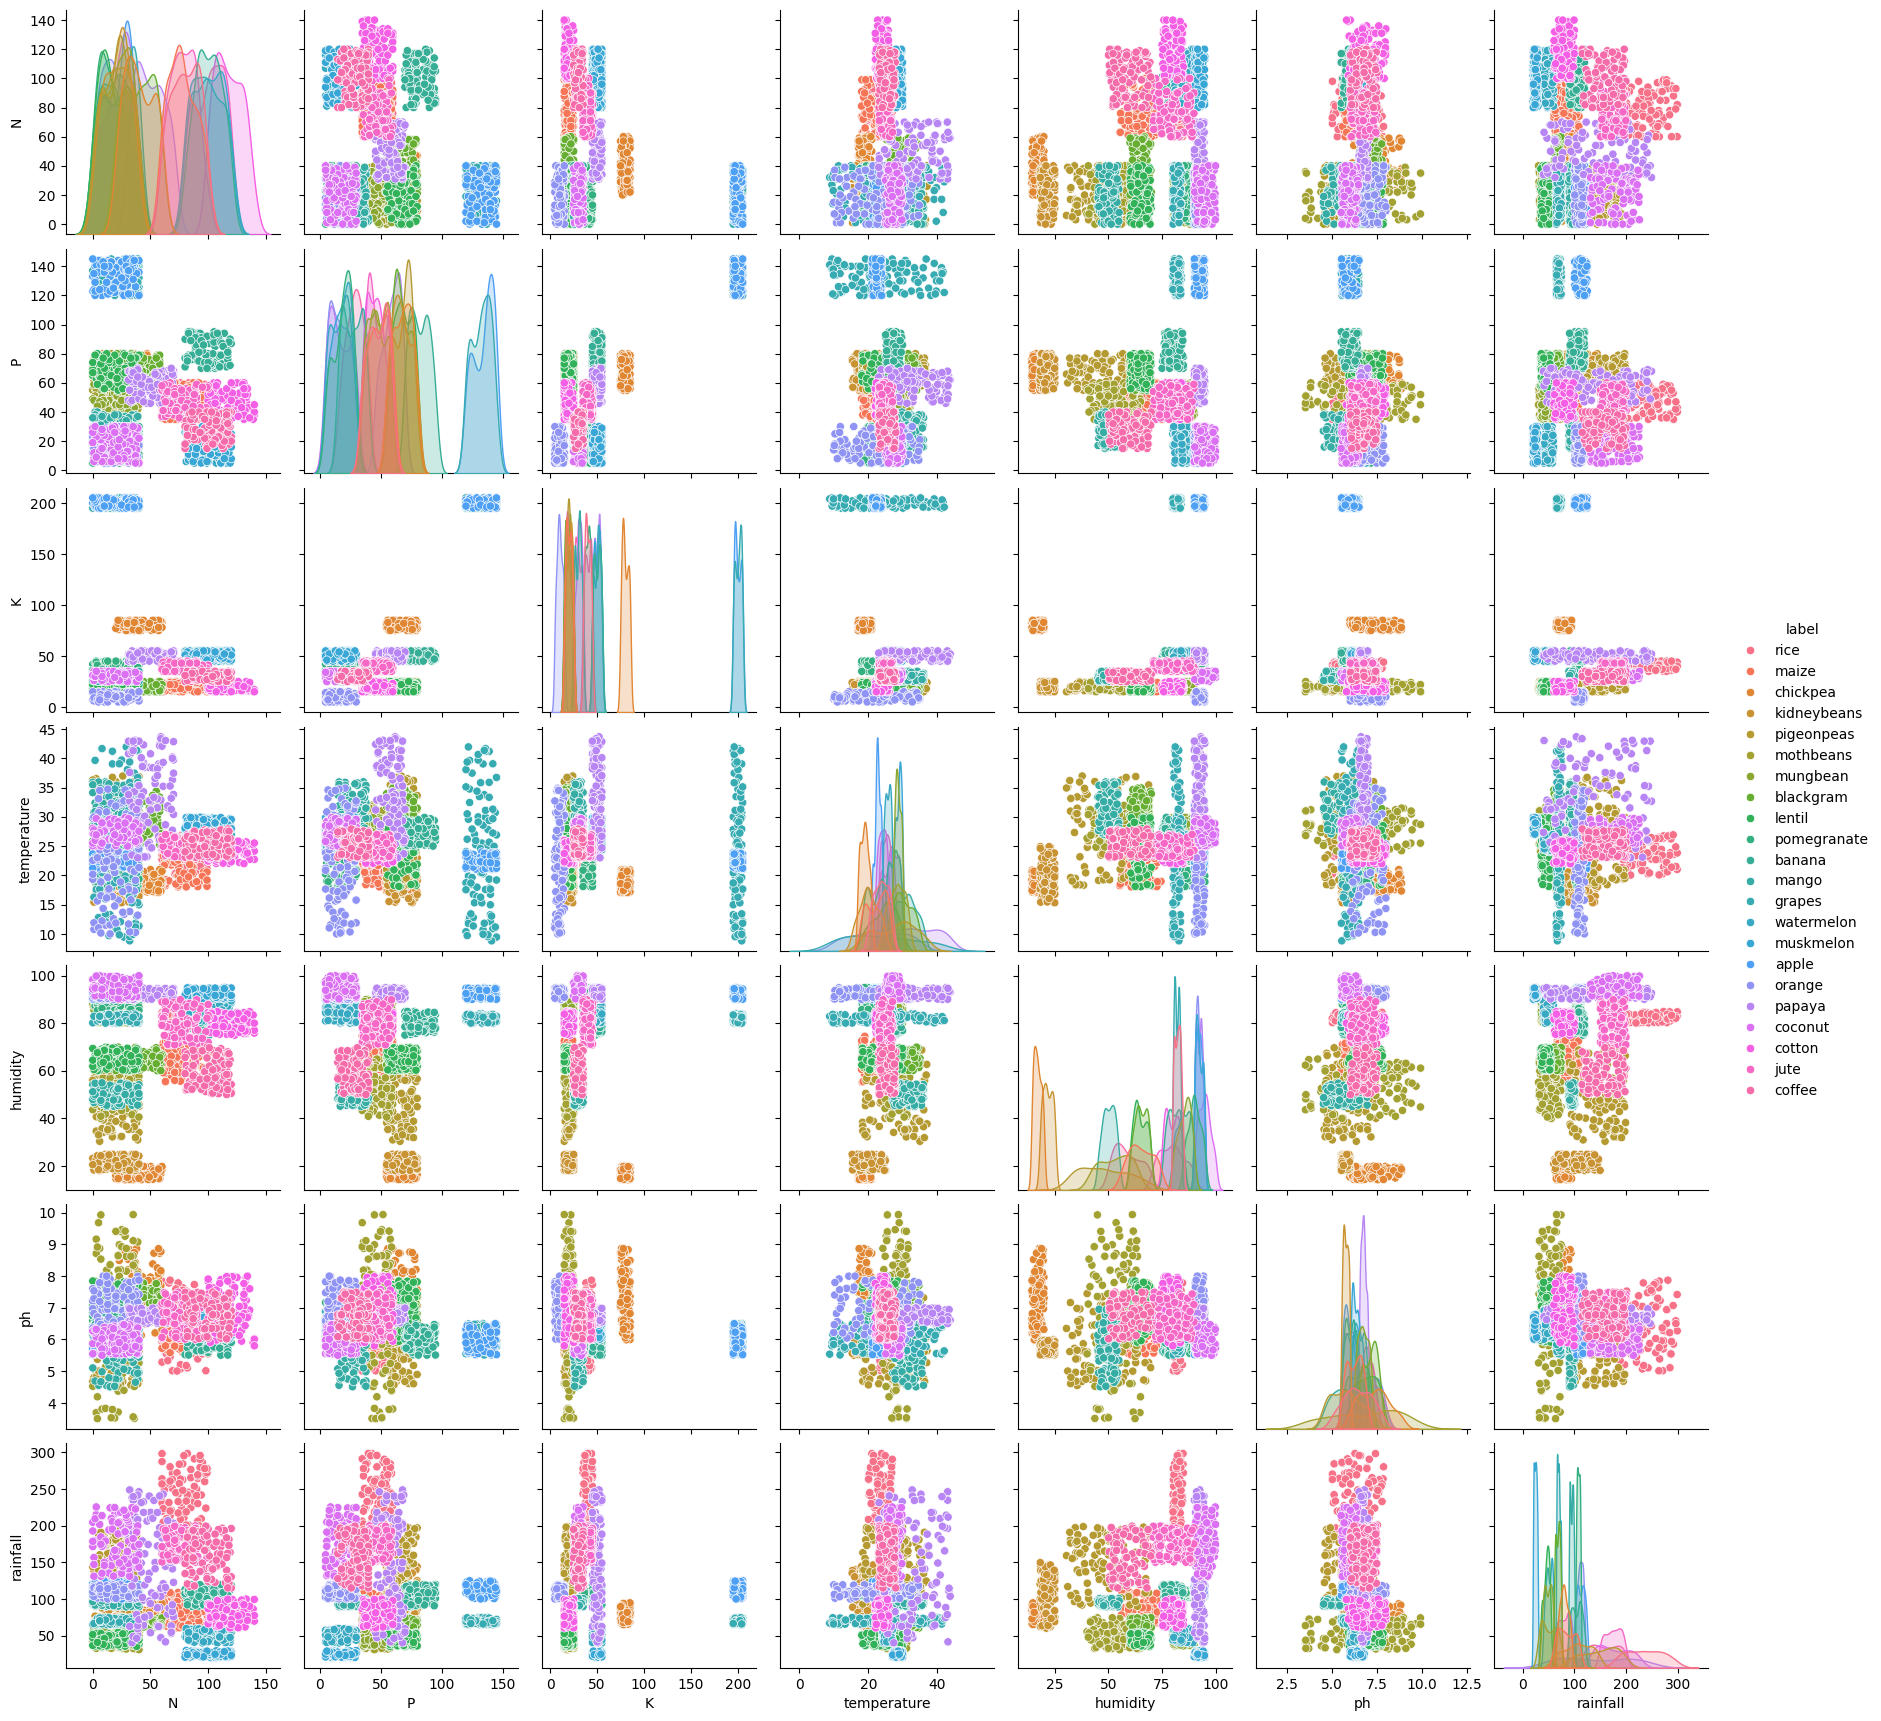

In [6]:
sns.pairplot(df,hue='label')
plt.show

In [7]:
x = df.drop(columns=['label'])
y = pd.get_dummies(df['label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

input_shape = X_train.shape[1]

### Heatmap to check null/missing values

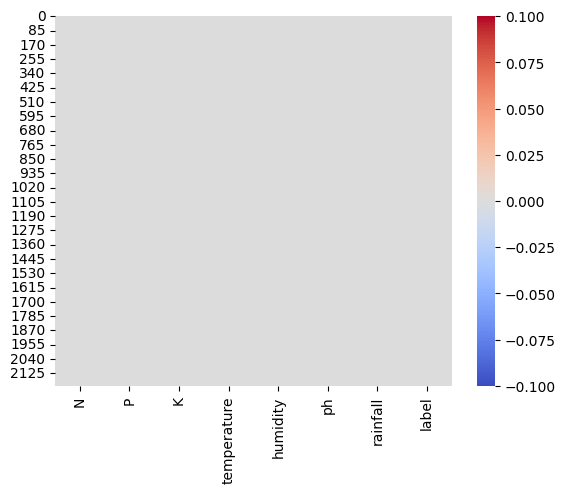

In [8]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

<h4> <u>Let's have a closer look at the distribution of temperature and ph.</u><br><br>
    
It is symmetrical and bell shaped, showing that trials will usually give a result near the average, but will occasionally deviate by large amounts. It's also fascinating how these two really resemble each other!</h4>

<Axes: xlabel='ph', ylabel='Density'>

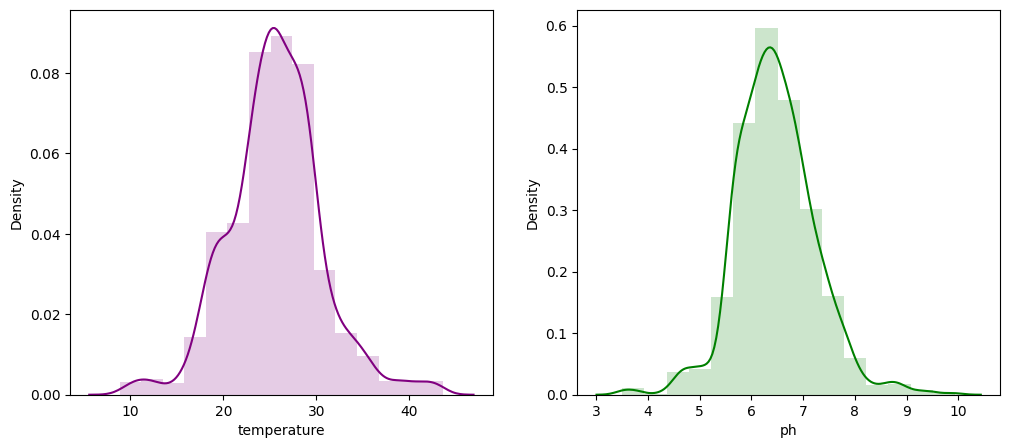

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

<h4> A quick check if the dataset is balanced or not. If found imbalanced, we would have to downsample some targets which are more in quantity but so far everything looks good! <h4>

<Axes: xlabel='count', ylabel='label'>

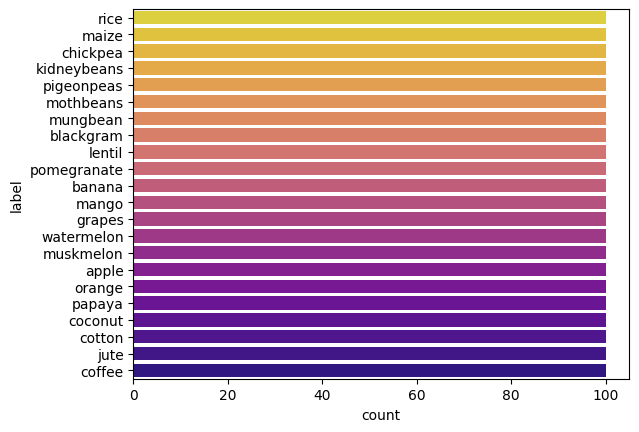

In [10]:
sns.countplot(y='label',data=df, palette="plasma_r")

<h4> A very important plot to visualize the diagonal distribution between two features for all the combinations! It is great to visualize how classes differ from each other in a particular space.

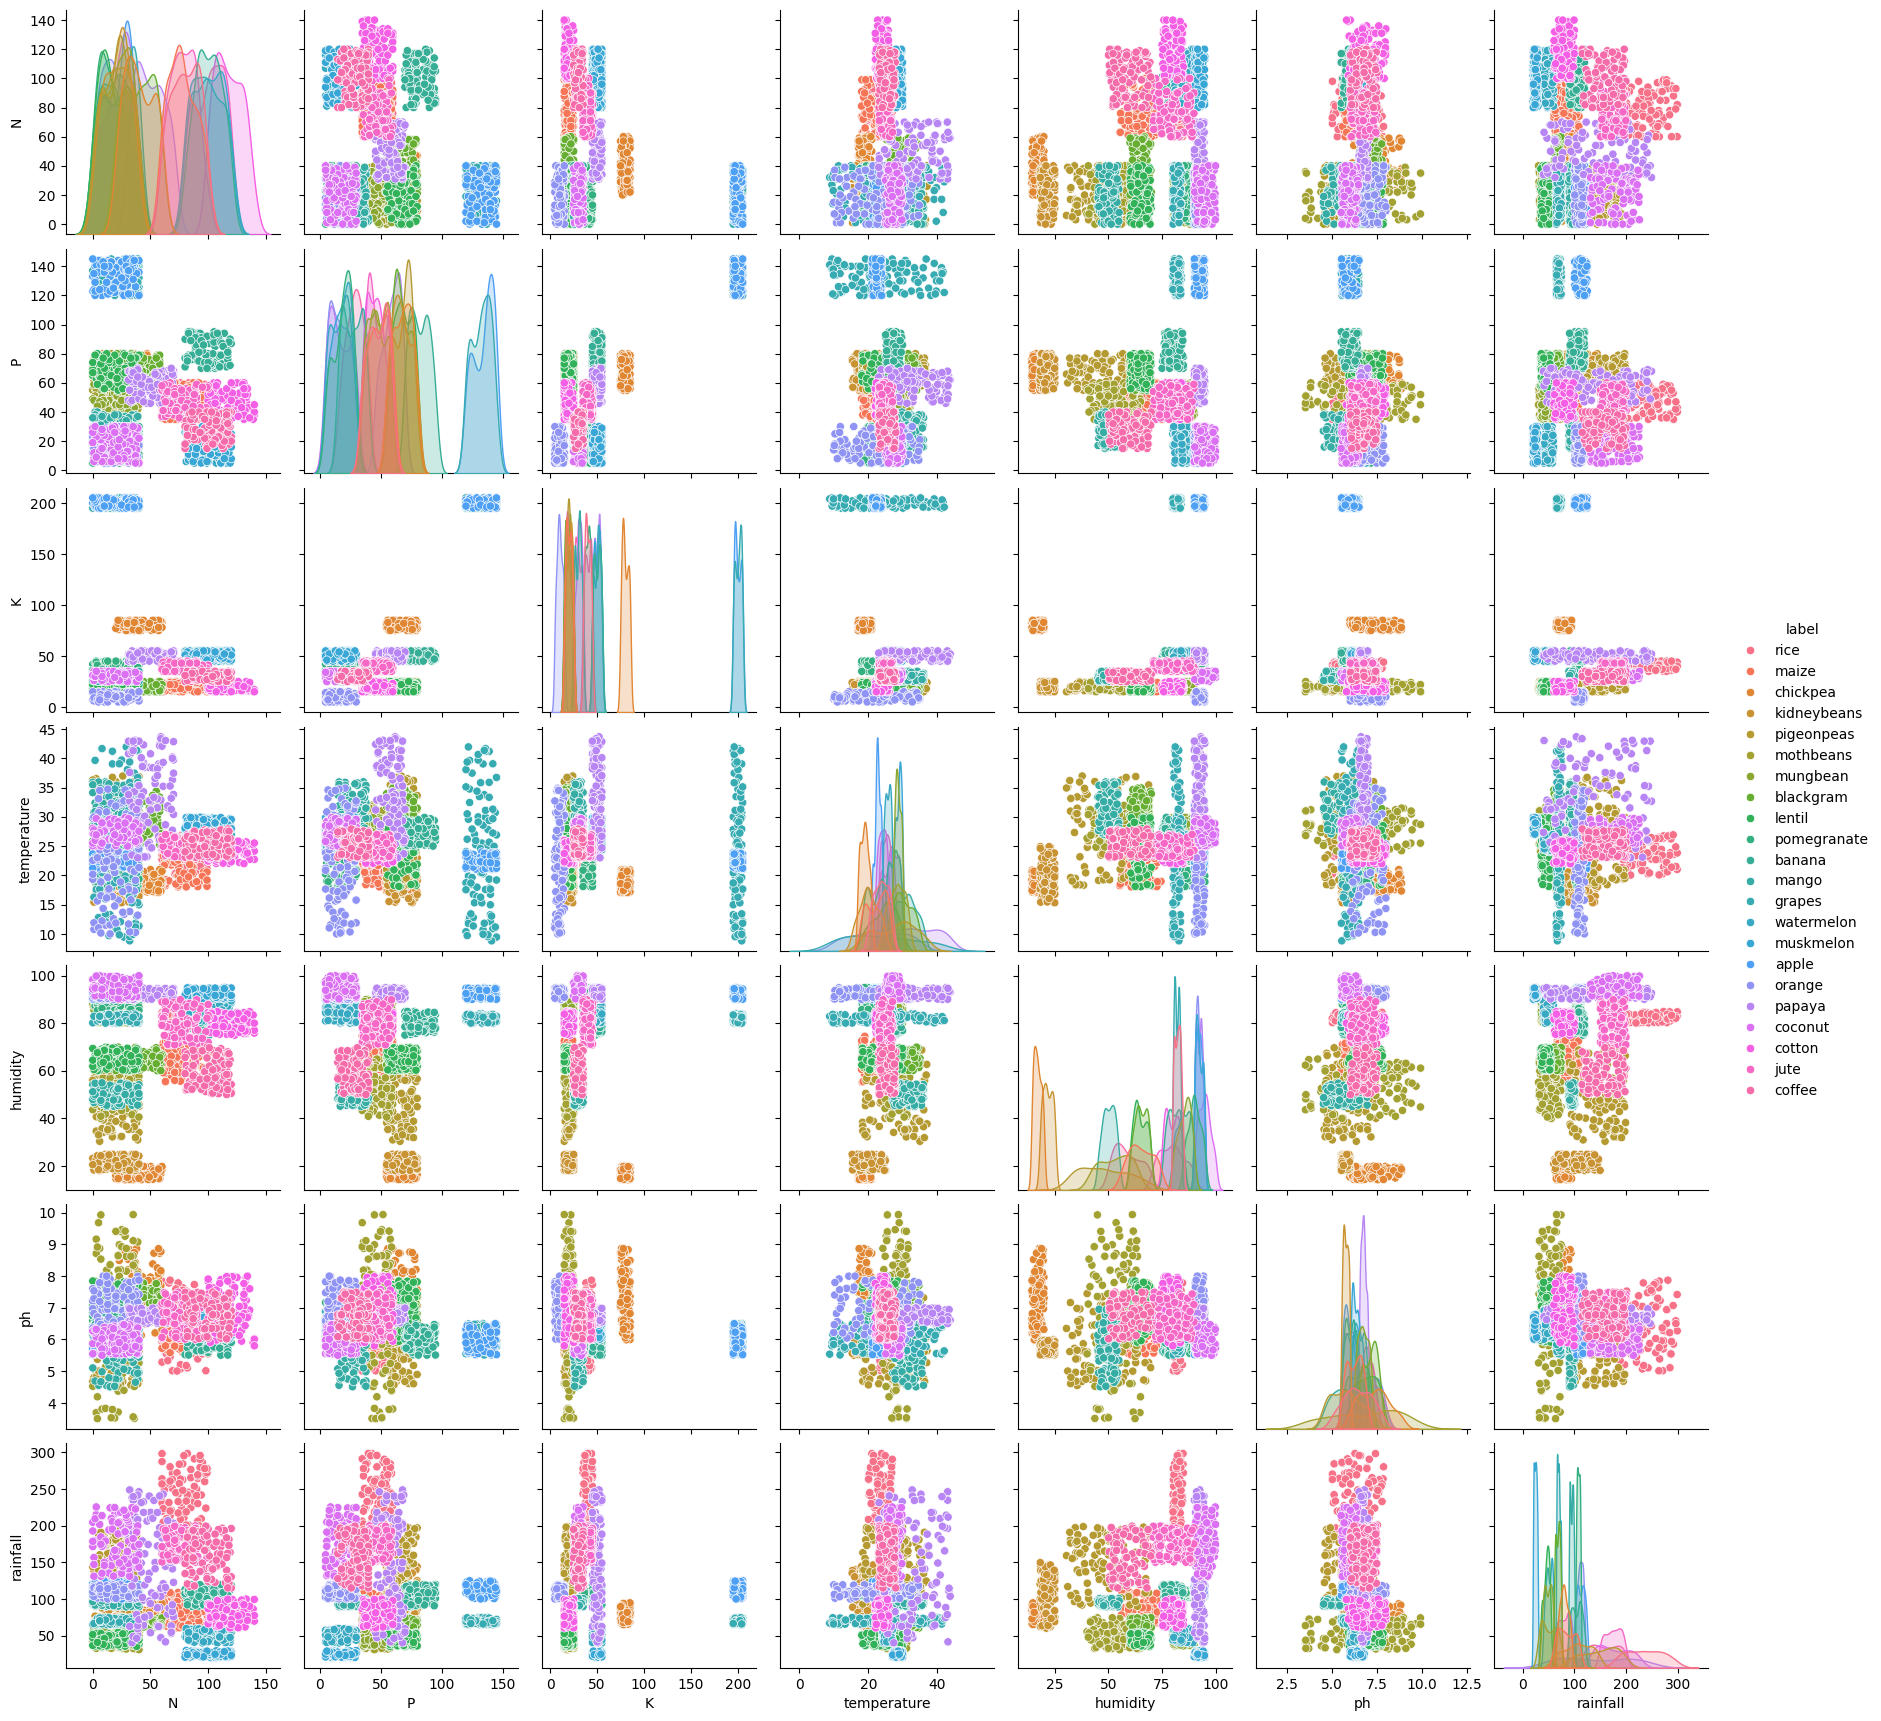

In [11]:
sns.pairplot(df, hue = 'label')

#### During rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).

#### Rain affects soil moisture which affects ph of the soil. Here are the crops which are likely to be planted during this season. 

- <b> Rice needs heavy rainfall (>200 mm) and a humidity above 80%. No wonder major rice production in India comes from East Coasts which has average of 220 mm rainfall every year!
- <b> Coconut is a tropical crop and needs high humidity therefore explaining massive exports from coastal areas around the country.

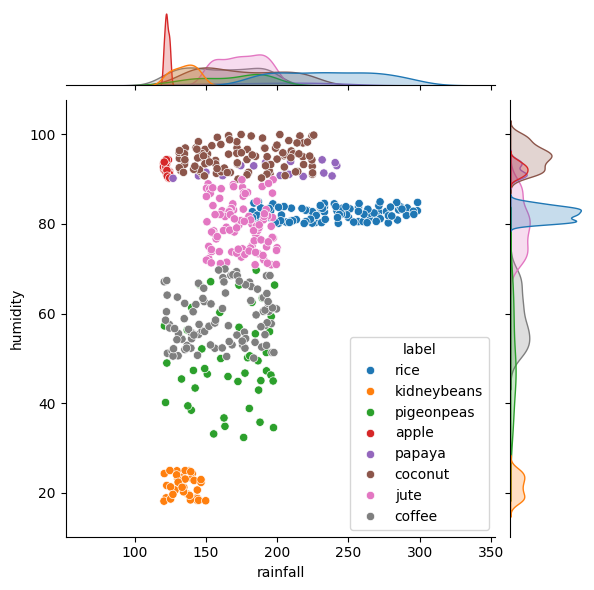

In [12]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

#### This graph correlates with average potassium (K) and average nitrogen (N) value (both>50). 
#### These soil ingredients direcly affects nutrition value of the food. Fruits which have high nutrients typically has consistent potassium values.

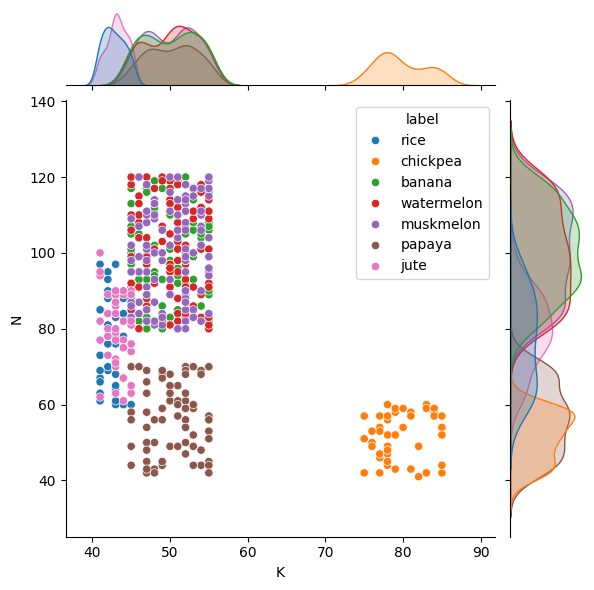

In [13]:
sns.jointplot(x="K",y="N",data=df[(df['N']>40)&(df['K']>40)],hue="label")

<h4>Let's try to plot a specfic case of pairplot between `humidity` and `K` (potassium levels in the soil.)</h4>

#### `sns.jointplot()` can be used for bivariate analysis to plot between humidity and K levels based on Label type. It further generates frequency distribution of classes with respect to features

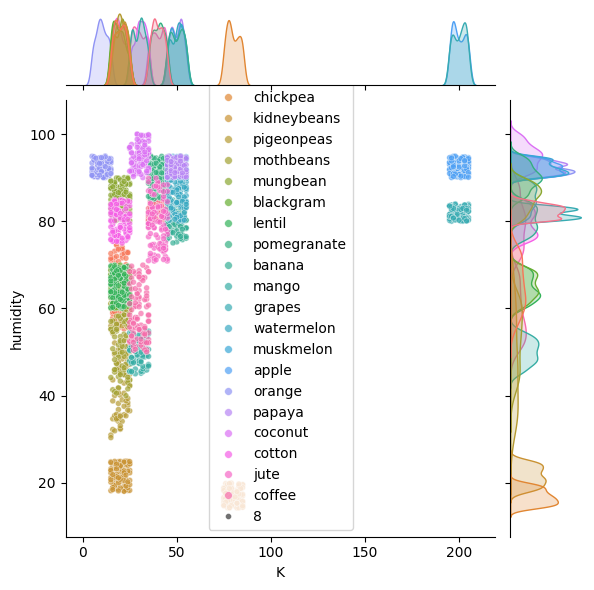

In [14]:
sns.jointplot(x="K",y="humidity",data=df,hue='label',size=8,s=30,alpha=0.7)

#### We can see ph values are critical when it comes to soil. A stability between 6 and 7 is preffered

<Axes: xlabel='ph', ylabel='label'>

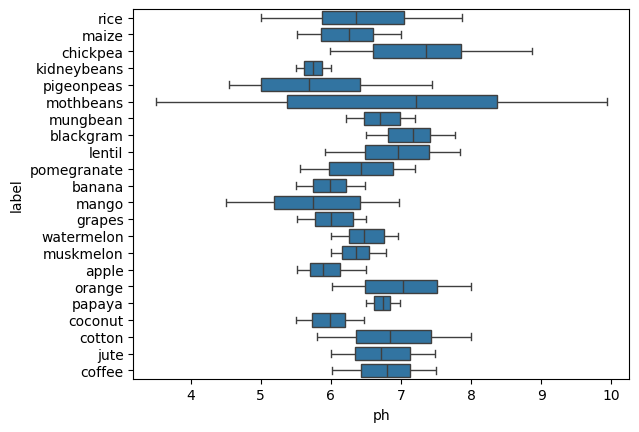

In [15]:
sns.boxplot(y='label',x='ph',data=df)

#### Another interesting analysis where Phosphorous levels are quite differentiable when it rains heavily (above 150 mm).

<Axes: xlabel='P', ylabel='label'>

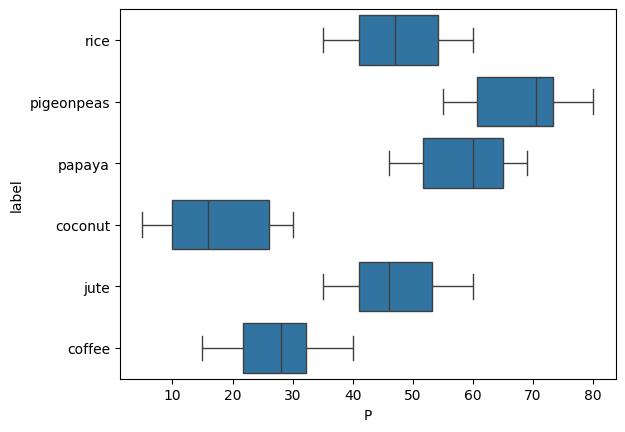

In [16]:
sns.boxplot(y='label',x='P',data=df[df['rainfall']>150])

#### Further analyzing phosphorous levels.

When humidity is less than 65, almost same phosphor levels(approx 14 to 25) are required for 6 crops which could be grown just based on the amount of rain expected over the next few weeks.

<Axes: xlabel='K', ylabel='rainfall'>

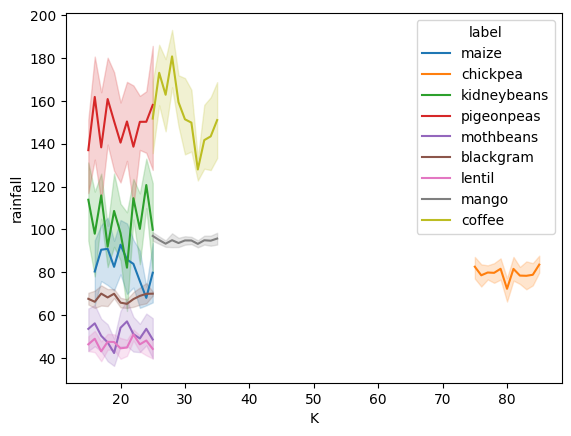

In [17]:
sns.lineplot(data = df[(df['humidity']<65)], x = "K", y = "rainfall",hue="label")

# DATA PRE-PROCESSING

### Let's make the data ready for machine learning model

In [18]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

**Correlation visualization between features. We can see how Phosphorous levels and Potassium levels are highly correlated.**

<Axes: >

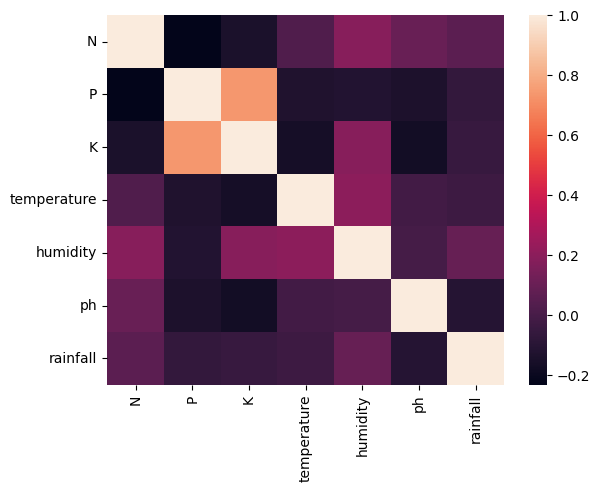

In [19]:
sns.heatmap(X.corr())

# FEATURE SCALING
**Feature scaling is required before creating training data and feeding it to the model.**

As we saw earlier, two of our features (temperature and ph) are gaussian distributed, therefore scaling them between 0 and 1 with MinMaxScaler.

# MODEL SELECTION

## KNN Classifier for Crop prediction (scikit-learn)
<hr>

KNN Test Score: 0.9545454545454546


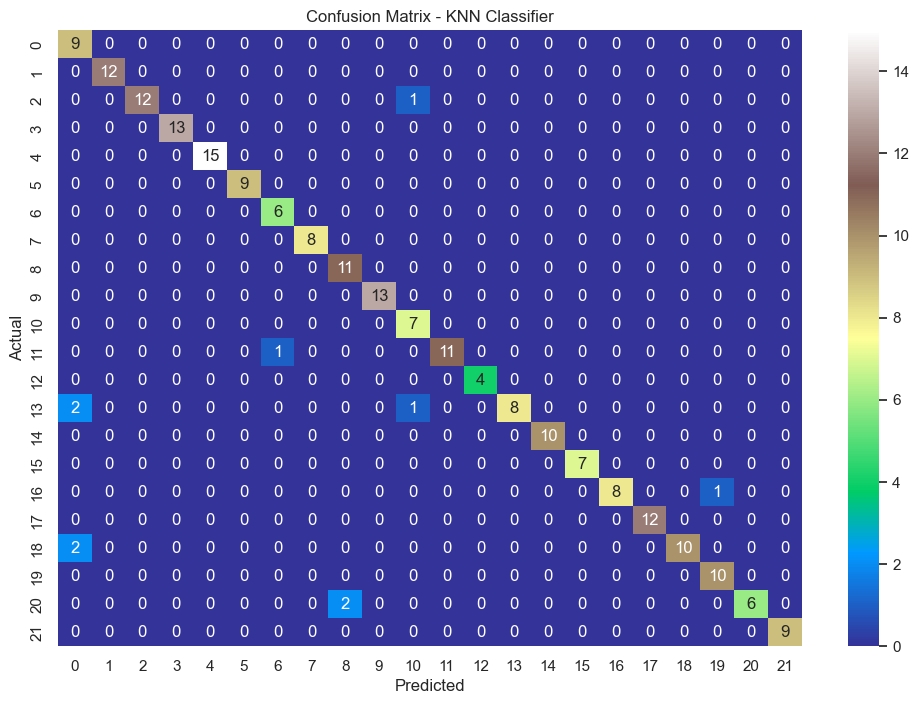

In [20]:
# One-hot encode the target variable if it's categorical
y = pd.get_dummies(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the KNN classifier
knn = OneVsRestClassifier(KNeighborsClassifier())
knn.fit(X_train_scaled, y_train)

# Evaluate the model
score = knn.score(X_test_scaled, y_test)
print(f'KNN Test Score: {score}')

# Predict using the KNN model
y_pred = knn.predict(X_test_scaled)

# Convert y_test and y_pred to single-label format for confusion matrix
y_test_single = y_test.values.argmax(axis=1)
y_pred_single = y_pred.argmax(axis=1)

# Create a confusion matrix
mat = confusion_matrix(y_test_single, y_pred_single)

# Map target values to labels
targets = {i: y.columns[i] for i in range(y.shape[1])}

df_cm = pd.DataFrame(mat, index=list(targets.values()), columns=list(targets.values()))

# Plot the confusion matrix heatmap
sns.set(font_scale=1.0)  # for label size
plt.figure(figsize=(12, 8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="terrain")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()

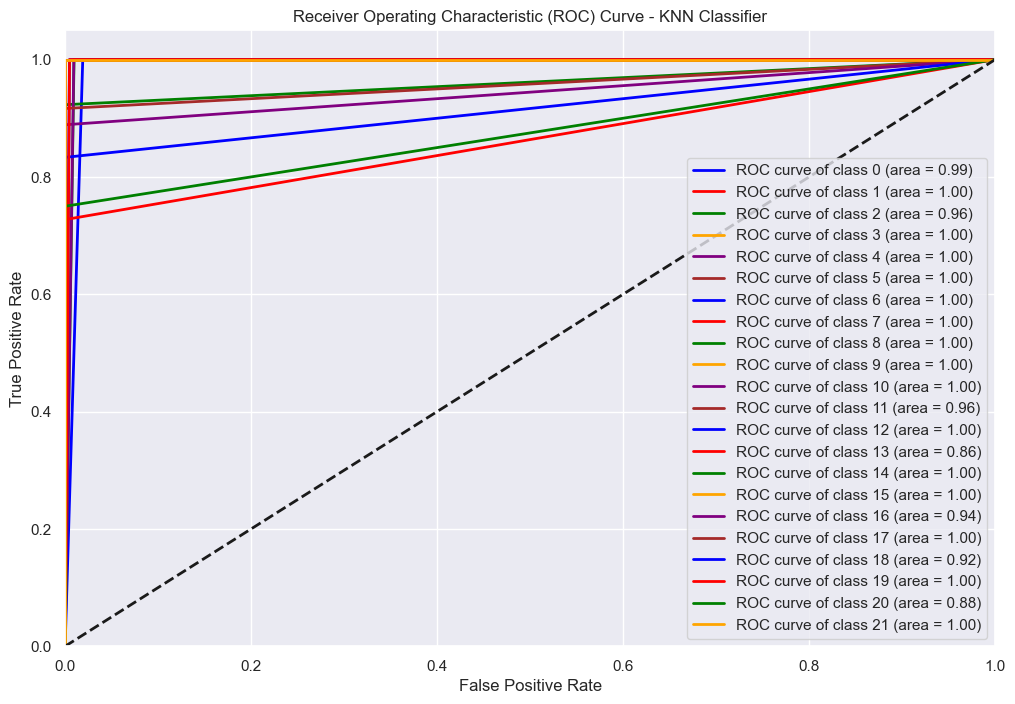

In [21]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y.shape[1]

# Binarize the output
y_test_bin = label_binarize(y_test_single, classes=[i for i in range(n_classes)])
y_pred_bin = label_binarize(y_pred_single, classes=[i for i in range(n_classes)])

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {targets[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN Classifier')
plt.legend(loc='lower right')
plt.show()

### Let's try different values of n_neighbors to fine tune and get better results

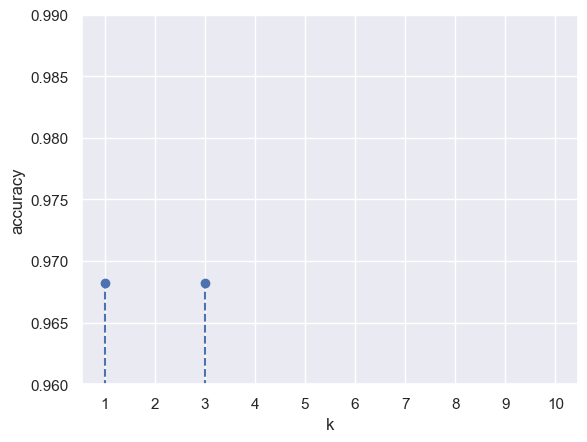

In [22]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);

## Classification using Support Vector Classifer (SVC)
<hr>

In [23]:
from sklearn.svm import SVC

# Convert y_train and y_test to single-label format
y_train_single = y_train.values.argmax(axis=1)
y_test_single = y_test.values.argmax(axis=1)

# Initialize and fit the SVC classifier with different kernels
svc_linear = SVC(kernel='linear').fit(X_train_scaled, y_train_single)
print("Linear Kernel Accuracy: ", svc_linear.score(X_test_scaled, y_test_single))

svc_rbf = SVC(kernel='rbf').fit(X_train_scaled, y_train_single)
print("RBF Kernel Accuracy: ", svc_rbf.score(X_test_scaled, y_test_single))

svc_poly = SVC(kernel='poly').fit(X_train_scaled, y_train_single)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled, y_test_single))

Linear Kernel Accuracy:  0.9863636363636363
RBF Kernel Accuracy:  0.9772727272727273
Poly Kernel Accuracy:  0.9045454545454545


### Let's try to increase SVC Linear model accuracy by parameter tuning.

**GridSearchCV can help us find the best parameters.**

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
parameters = {'C': np.logspace(-3, 2, 6).tolist()}

# Initialize GridSearchCV with SVC (linear kernel)
model = GridSearchCV(estimator=SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)

# Fit the model
model.fit(X_train_scaled, y_train_single)

# Print the best parameters and the best accuracy
print(f"Best Parameters: {model.best_params_}")
print(f"Best Accuracy: {model.best_score_}")

# Evaluate on test data
best_model = model.best_estimator_
test_accuracy = best_model.score(X_test_scaled, y_test_single)
print(f"Test Accuracy with Best Model: {test_accuracy}")


Best Parameters: {'C': 10.0}
Best Accuracy: 0.9873737373737373
Test Accuracy with Best Model: 0.990909090909091


**POINTS TO BE HIGHLIGHTED**
1. *Interestingly liner kernel also gives satisfactory results but fine tuning increases the computation and might be inefficient in some cases*
2. *The accuracy can be increased in poly kernel by tweaking parameters but might lead to intensive overfitting.*
3. *RBF has better result than linear kernel.*
4. *Poly kernel so far wins by a small margin.*

## Classifying using decision tree
<hr>

In [27]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.990909090909091

### Let's visualize the import features which are taken into consideration by decision trees.

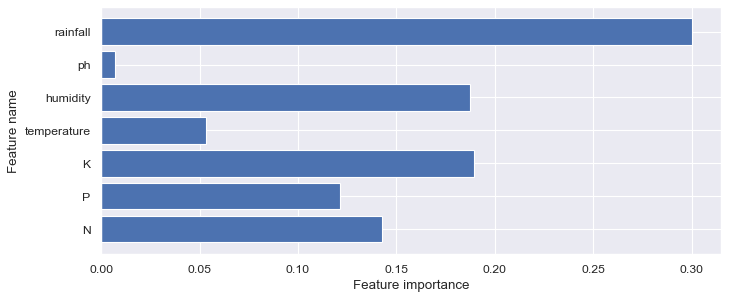

In [28]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

## Classification using Random Forest.
<hr>

In [29]:
'''
max depth and n_estimator are important to fine tune otherwise trees will be densely graphed which will be a classic case of overfitting. max_depth=4 and n_estimators=10 gives pretty much satisfying results by making sure model is able to generalize well.
'''

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

RF Accuracy on training set: 0.23
RF Accuracy on test set: 0.23


### <div style="color:blue;"><b> Classification report </b></div>
#### **Let's use <u>yellowbrick</u> for classification report as they are great for visualizing in a tabular format**

Gradient Boosting accuracy: 0.990909090909091


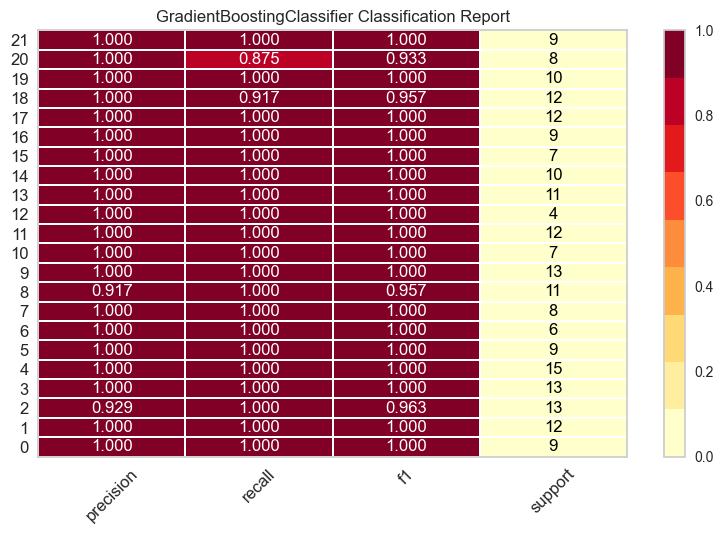

<Axes: title={'center': 'GradientBoostingClassifier Classification Report'}>

In [33]:
from yellowbrick.classifier import ClassificationReport

# Initialize and fit the Gradient Boosting classifier
grad = GradientBoostingClassifier()
grad.fit(X_train_scaled, y_train_single)

# Evaluate the model
accuracy = grad.score(X_test_scaled, y_test_single)
print(f'Gradient Boosting accuracy: {accuracy}')

# Visualize the classification report using Yellowbrick
visualizer = ClassificationReport(grad, classes=y.columns, support=True)
visualizer.fit(X_train_scaled, y_train_single)
visualizer.score(X_test_scaled, y_test_single)
visualizer.show()

## Classification using Gradient Boosting
<hr>

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and fit the Gradient Boosting classifier
grad = GradientBoostingClassifier().fit(X_train_scaled, y_train_single)

# Evaluate the model
print('Gradient Boosting accuracy: {}'.format(grad.score(X_test_scaled, y_test_single)))

Gradient Boosting accuracy: 0.990909090909091
